In [1]:
import sys
sys.path.append("../acoustooptic_lab")
from analysis import System
import numpy as np
import matplotlib.pyplot as plt

In [2]:
laser = System("deflectometry", ["../../../data/20250331/deflectometry_poc/iter_" + str(x) + ".tdms" for x in range(0, 50)], channel = "Y", set_data = True)

In [8]:
agg = [np.array([d.collection[0].t]), np.array([d.collection[0].x])]
count = 1
for i, d in enumerate(laser.get_data()):
    d.apply("detrend", mode = "linear", inplace = True)
    for j, c in enumerate(d.collection):
        if i == 0 and j == 0:
            pass
        else:
            agg[0] = np.vstack((agg[0], c.t))
            agg[1] = np.vstack((agg[1], c.x))
            count += 1
print(agg, count)

[array([[0.000000e+00, 4.000000e-09, 8.000000e-09, ..., 1.048560e-03,
        1.048564e-03, 1.048568e-03],
       [0.000000e+00, 4.000000e-09, 8.000000e-09, ..., 1.048560e-03,
        1.048564e-03, 1.048568e-03],
       [0.000000e+00, 4.000000e-09, 8.000000e-09, ..., 1.048560e-03,
        1.048564e-03, 1.048568e-03],
       ...,
       [0.000000e+00, 4.000000e-09, 8.000000e-09, ..., 1.048560e-03,
        1.048564e-03, 1.048568e-03],
       [0.000000e+00, 4.000000e-09, 8.000000e-09, ..., 1.048560e-03,
        1.048564e-03, 1.048568e-03],
       [0.000000e+00, 4.000000e-09, 8.000000e-09, ..., 1.048560e-03,
        1.048564e-03, 1.048568e-03]]), array([[-0.00074304, -0.0004989 , -0.00092615, ..., -0.00677541,
        -0.00213674,  0.        ],
       [-0.00189233, -0.00378443,  0.00244114, ..., -0.00164928,
        -0.00171033,  0.        ],
       [-0.00032547,  0.00083419,  0.00022383, ..., -0.00136912,
         0.00595509,  0.        ],
       ...,
       [-0.00703973, -0.00691766,  0.

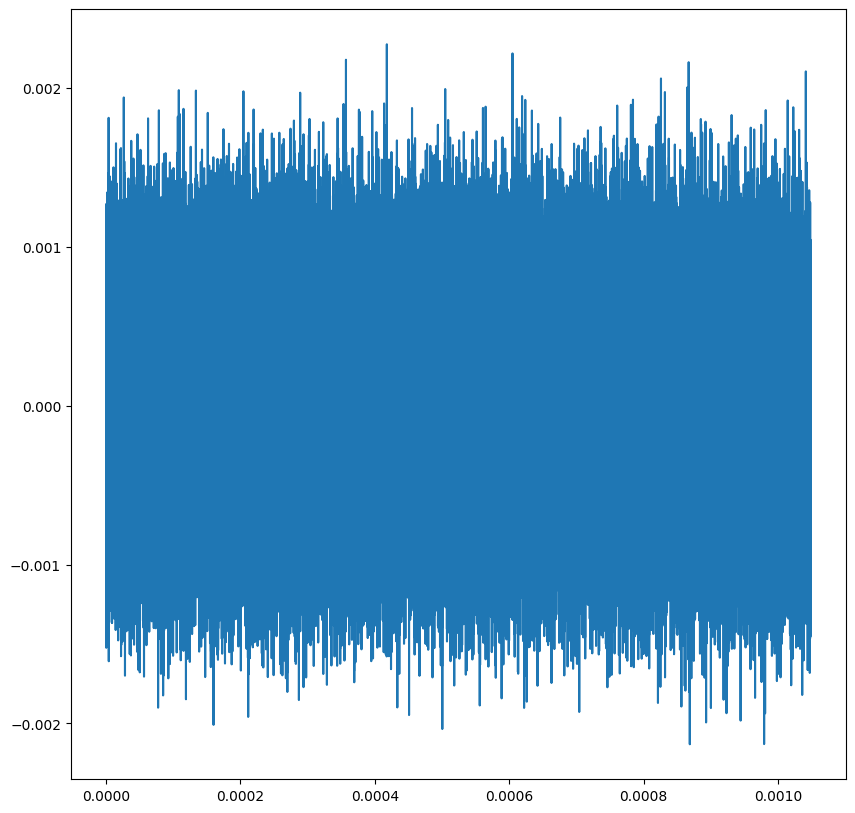

In [11]:
agg[0] = np.average(agg[0], axis = 0)
agg[1] = np.average(agg[1], axis = 0)

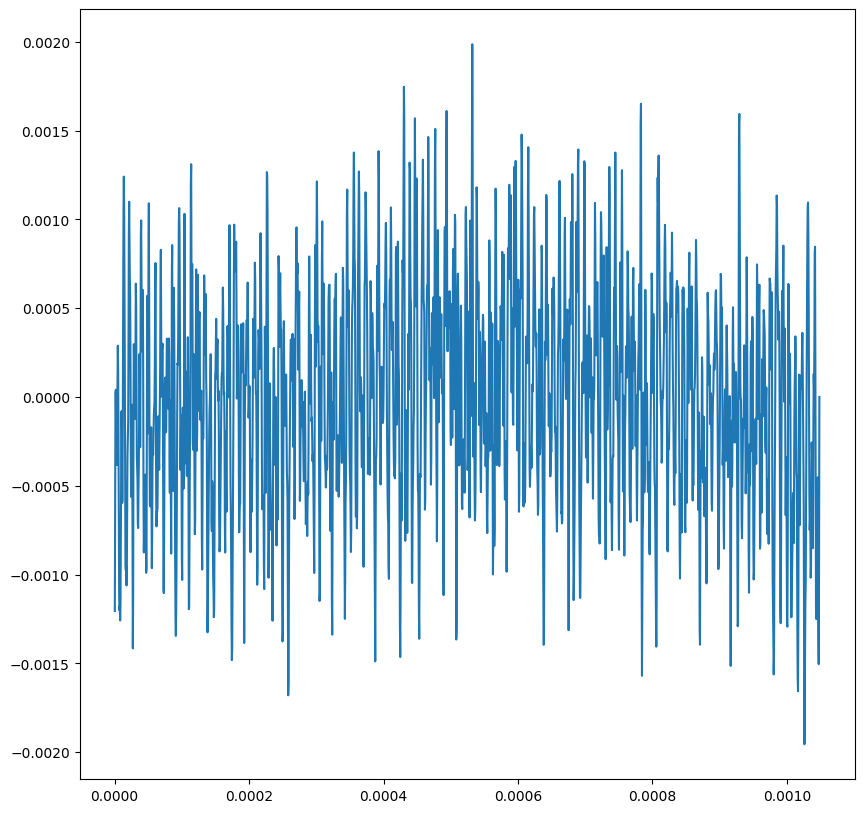

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
# ax.set_xlim(0, 1e-4)
for i, d in enumerate(laser.get_data()[1:2]):
    laser.set_data(ind = i)
    d.apply("detrend", mode = "linear", inplace = True)
    # d.apply("bin_average", Npts = int(laser.get_data()[i].r / (2 * 1e6)), inplace = True)
    d.apply("lowpass", cutoff = 5e5, inplace = True)
    for j, c in enumerate(d.collection[:1]):
        ax.plot(c.t, c.x)

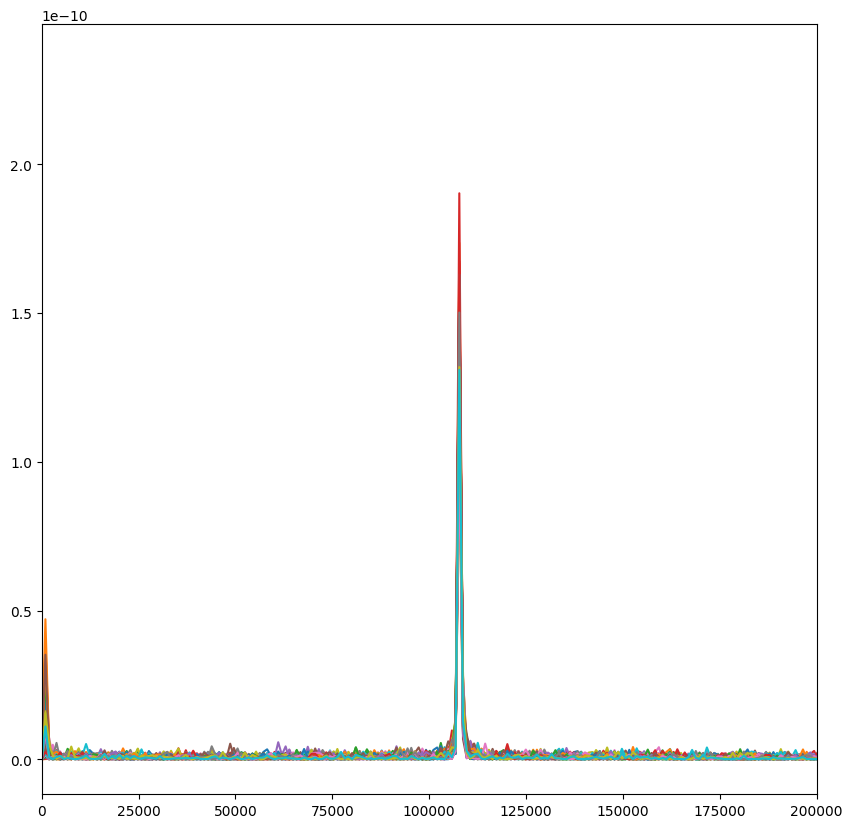

In [3]:
from scipy.signal import periodogram

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
laser.set_data(ind = 0)
laser.get_data()[0].apply("detrend", mode = "linear", inplace = True)
freqs = np.array([periodogram(laser.get_data()[0].collection[0].x, laser.get_data()[0].r, nfft = 2 ** 18)[0]])
psds = np.array([periodogram(laser.get_data()[0].collection[0].x, laser.get_data()[0].r, nfft = 2 ** 18)[1]])
ax.plot(freqs[0], psds[0])

f, p = periodogram(laser.get_data()[0].collection[1].x, laser.get_data()[0].r, nfft = 2 ** 18)
freqs = np.vstack((freqs, f))
psds = np.vstack((psds, p))
ax.plot(freqs[1], psds[1])


for i in range(1, len(laser.get_data())):
    laser.set_data(ind = i)
    laser.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    f, p = periodogram(laser.get_data()[i].collection[0].x, laser.get_data()[i].r, nfft = 2 ** 18)
    freqs = np.vstack((freqs, f))
    psds = np.vstack((psds, p))
    ax.plot(f, p)
    f, p = periodogram(laser.get_data()[i].collection[1].x, laser.get_data()[i].r, nfft = 2 ** 18)
    freqs = np.vstack((freqs, f))
    psds = np.vstack((psds, p))
    ax.plot(f, p)
    ax.set_xlim(0, 2e5)
f_avg = np.average(freqs, axis = 1)
p_avg = np.average(psds, axis = 1)
ax.plot(f_avg, p_avg, c = "black", zorder = 10000)